In [1]:
##### Audio Classification Using Machine Learning
#####dataset url https://urbansounddataset.weebly.com/urbansound8k.html

# EDA

In [2]:
!pip install librosa

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pip install resampy

Note: you may need to restart the kernel to use updated packages.


In [5]:
filename='UrbanSound8K/dog_bark.wav'

In [6]:
import IPython.display as ipd
import librosa
import librosa.display

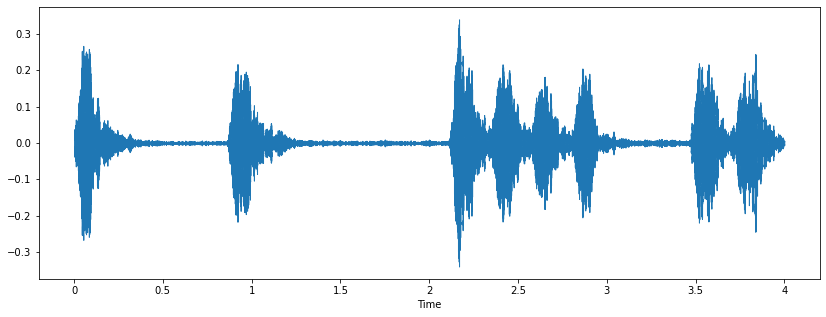

In [7]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

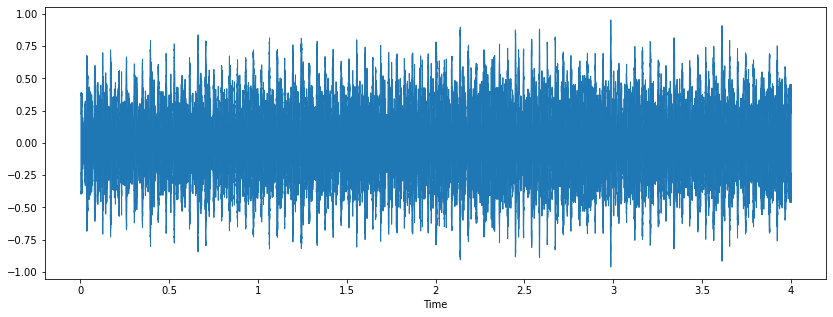

In [12]:
### Sound
filename='UrbanSound8K/drilling.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [13]:
sample_rate

22050

In [14]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [15]:
wave_sample_rate

44100

In [16]:
wave_audio

array([[10489,  9151],
       [ 9553,  9744],
       [ 8660, 10220],
       ...,
       [11117, 17460],
       [10920, 17062],
       [10583, 16556]], dtype=int16)

In [17]:
data

array([0.22105733, 0.31147373, 0.26495025, ..., 0.4503034 , 0.42876196,
       0.4496042 ], dtype=float32)

In [18]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [19]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# Pre-Processing

In [20]:
### read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/drilling.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [21]:
print(librosa_audio_data)

[0.22105733 0.31147373 0.26495025 ... 0.4503034  0.42876196 0.4496042 ]


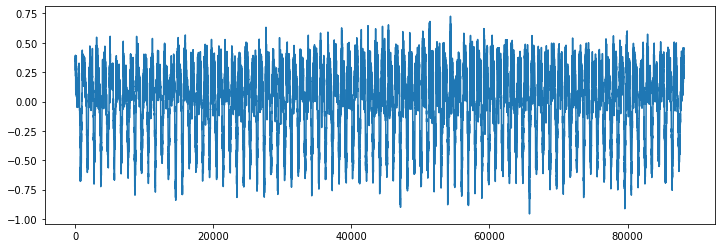

In [22]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [23]:
### Just to check , read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [24]:
wave_audio

array([[10489,  9151],
       [ 9553,  9744],
       [ 8660, 10220],
       ...,
       [11117, 17460],
       [10920, 17062],
       [10583, 16556]], dtype=int16)

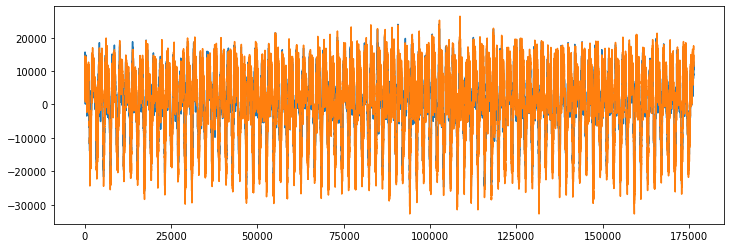

In [25]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples.It gives Features extracted from patterns in frequency and time characteristics. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [26]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [27]:
mfccs

array([[-1.22906883e+02, -1.23734085e+02, -1.22381920e+02, ...,
        -1.11095215e+02, -1.01832664e+02, -8.14414215e+01],
       [ 1.25124786e+02,  1.40966064e+02,  1.48583862e+02, ...,
         1.68579376e+02,  1.45028687e+02,  1.21862885e+02],
       [-1.48540745e+01, -2.71234093e+01, -3.62249222e+01, ...,
        -3.64198990e+01, -2.22964745e+01, -2.85062456e+00],
       ...,
       [ 4.95576286e+00,  7.52594948e+00,  6.70003319e+00, ...,
         1.79093027e+00,  2.90842485e+00,  2.79876757e+00],
       [ 3.84046459e+00,  4.03901100e+00,  5.14087486e+00, ...,
         7.73885250e-02, -6.34973288e-01,  1.21690392e+00],
       [ 6.68846941e+00,  3.62380481e+00,  6.81478786e+00, ...,
        -1.38812292e+00,  2.18823814e+00,  3.01466799e+00]], dtype=float32)

In [28]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [36]:
pip install resampy

Note: you may need to restart the kernel to use updated packages.


In [46]:
 pip install resampy

Note: you may need to restart the kernel to use updated packages.


In [29]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [30]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [07:07,  9.30it/s]C:\Users\mrmus\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [16:08, 13.69it/s]C:\Users\mrmus\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [16:08, 21.30it/s]C:\Users\mrmus\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [16:51,  8.63it/s]


In [31]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [32]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [33]:
X.shape

(8732, 40)

In [34]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [35]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [37]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [38]:
X_train.shape

(6985, 40)

In [39]:
X_test.shape

(1747, 40)

ModuleNotFoundError: No module named 'tensorflow'